#AKEEM  OTAPO
#EEGR565 ASSIGNMENT1
#VECTORIZING BODY OF AN ARTICLE AND OBTAINING THE RELATIVE FREQUENCY WITH A TEXT FRAME
Google link: https://drive.google.com/drive/folders/1ZONHx4cKBBVjxIXx81vkPSTsDIiPZJCy?usp=sharing

In [1]:
# Creating a python script to read_csv from the pandas library and display the first few rows of the headings of article

import pandas as pd

df = pd.read_csv("cnn_data_4_5_-1076392975.csv")

In [2]:
df.head()

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020


In [6]:
#Vectorization of the body of each the article

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english", max_features=500)

bag_of_words = cv.fit_transform(df["body"])

sum_words = bag_of_words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

for word, count in words_freq:
    print(word + ":", count)

said: 1922
people: 717
company: 599
coronavirus: 573
business: 546
workers: 498
new: 482
time: 457
work: 403
companies: 378
employees: 374
cnn: 364
year: 363
like: 362
week: 351
home: 346
government: 318
told: 303
oil: 297
pandemic: 297
trump: 296
just: 293
help: 289
000: 288
need: 285
according: 281
make: 276
health: 254
going: 250
billion: 249
crisis: 241
united: 239
states: 239
pay: 239
industry: 238
million: 232
day: 229
world: 228
economy: 227
market: 226
working: 224
demand: 214
including: 203
march: 201
president: 200
social: 200
don: 198
economic: 195
financial: 194
businesses: 193
virus: 189
stores: 187
food: 186
global: 183
small: 181
weeks: 180
years: 171
production: 170
right: 166
way: 166
added: 165
amazon: 165
airlines: 164
service: 160
customers: 159
ceo: 156
long: 155
country: 154
data: 154
unemployment: 153
money: 150
want: 150
month: 148
stay: 147
china: 147
10: 147
public: 145
supply: 144
number: 143
support: 140
jobs: 140
able: 138
days: 138
months: 138
19: 137
news

In [13]:
#Creating Dataframe of top 500 features

import pandas as pd

max_features = pd.DataFrame(words_freq, columns = ["Words", "Frequency"])

max_features.to_csv("max_features.csv")

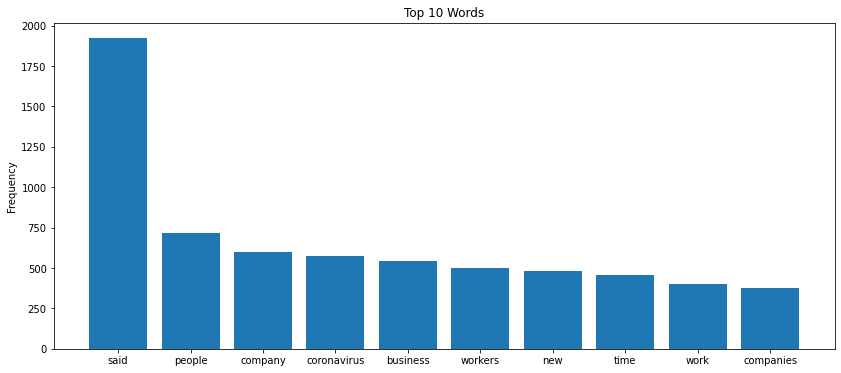

In [19]:
#Plotting bar chart (Histogram) of top ten words

import numpy as np

import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
words = []
freqs = []
for word, count in words_freq:
    words.append(word)
    freqs.append(count)
plt.bar(np.arange(10), freqs[:10], align='center')
plt.xticks(np.arange(10), words[:10])
plt.ylabel('Frequency')
plt.title('Top 10 Words')
plt.show()

In [21]:
#Removing Outliers

features = max_features[max_features["Frequency"]<1000]

features.to_csv("maxoutliers.csv")

features

,Words,Frequency
1,people,717
2,company,599
3,coronavirus,573
4,business,546
5,workers,498
...,...,...
495,personal,45
496,internet,45
497,effort,45
498,letter,45


Text(0, 0.5, 'Frequency')

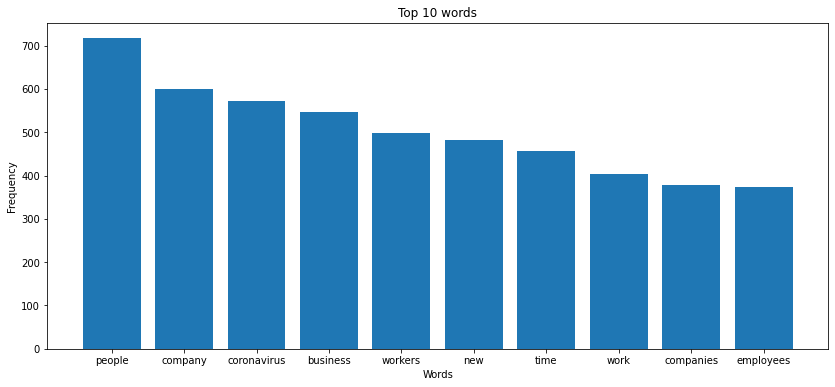

In [23]:
#Plotting bar chart (histogram) of top ten words after removing outliers

top_10 = features.head(10)

plt.figure(figsize = (14,6))

plt.bar(top_10["Words"], top_10["Frequency"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
#Obtaining frequency of tokens in Business Article and appearing in pandemic text

f = open("pandemic_092937.txt","r")

cv = CountVectorizer(stop_words = "english")

bag_of_words = cv.fit_transform(f)

sum_words = bag_of_words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]


In [47]:
pandemic_df = pd.DataFrame(words_freq, columns = ["Words","Frequency" ])

In [50]:
test = features[features["Words"].isin(pandemic_df["Words"]) ]
test

,Words,Frequency
3,coronavirus,573
4,business,546
19,pandemic,297
45,social,200
84,19,137
117,covid,112
118,distancing,112
154,place,98
168,emergency,92
169,spread,92


Text(0, 0.5, 'Frequency')

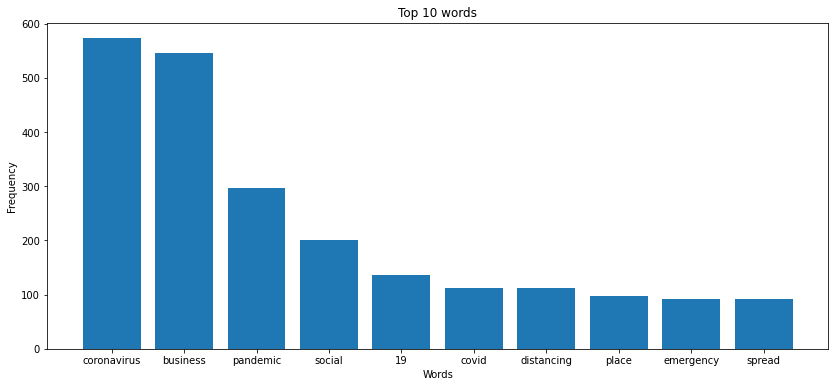

In [52]:
#plotting top ten result
top_ten = test.head(10)
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.bar(top_ten["Words"], top_ten["Frequency"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [ ]:
# Thank you for the opportunity